In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
import tensorflow_datasets as tfds
imdb,info=tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [4]:
import numpy as np
train_data, test_data=imdb["train"], imdb["test"]

In [5]:
training_sentences=[]
training_labels=[]

testing_sentences=[]
testing_labels=[]

In [6]:
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [7]:
training_labels_final=np.array(training_labels)
testing_labels_final=np.array(testing_labels)

In [8]:
#hyperparameters
vocab_size=1000
embedding_dim=10
max_length=120
trunc_type='post'
oov_tok="<OOV>"

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(training_sentences)
padded=pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 10)           10000     
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7206      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 17,213
Trainable params: 17,213
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs=10
history=model.fit(padded,training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final),verbose=2)

Epoch 1/10
782/782 - 2s - loss: 0.5474 - accuracy: 0.7009 - val_loss: 0.4248 - val_accuracy: 0.8004
Epoch 2/10
782/782 - 2s - loss: 0.3997 - accuracy: 0.8180 - val_loss: 0.4193 - val_accuracy: 0.8036
Epoch 3/10
782/782 - 2s - loss: 0.3606 - accuracy: 0.8402 - val_loss: 0.4300 - val_accuracy: 0.7980
Epoch 4/10
782/782 - 2s - loss: 0.3233 - accuracy: 0.8630 - val_loss: 0.4561 - val_accuracy: 0.7919
Epoch 5/10
782/782 - 2s - loss: 0.2867 - accuracy: 0.8826 - val_loss: 0.4906 - val_accuracy: 0.7845
Epoch 6/10
782/782 - 2s - loss: 0.2536 - accuracy: 0.8985 - val_loss: 0.5401 - val_accuracy: 0.7767
Epoch 7/10
782/782 - 2s - loss: 0.2251 - accuracy: 0.9142 - val_loss: 0.6043 - val_accuracy: 0.7663
Epoch 8/10
782/782 - 2s - loss: 0.1991 - accuracy: 0.9239 - val_loss: 0.6433 - val_accuracy: 0.7684
Epoch 9/10
782/782 - 3s - loss: 0.1777 - accuracy: 0.9342 - val_loss: 0.7082 - val_accuracy: 0.7605
Epoch 10/10
782/782 - 2s - loss: 0.1579 - accuracy: 0.9433 - val_loss: 0.7762 - val_accuracy: 0.7574

In [13]:
e=model.layers[0]
weights=e.get_weights()[0]
print(weights.shape)

(1000, 10)


In [14]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [15]:
import io

out_v=io.open('vecs.tsv', 'w', encoding='utf-8')
out_m=io.open('meta.tsv','w', encoding='utf-8')
for word_num in range(1,vocab_size):
    word=reverse_word_index[word_num]
    embeddings=weights[word_num]
    out_m.write(word+"\n")
    out_v.write('\t'.join([str(x) for x in embeddings])+"\n")
out_v.close()
out_m.close()

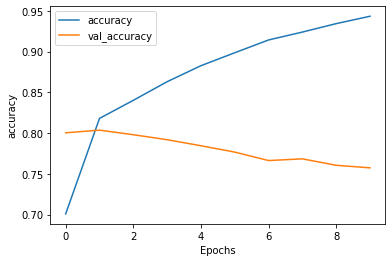

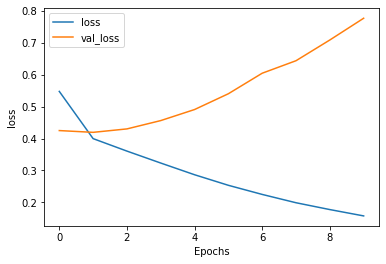

In [16]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history,"loss")

In [17]:
#Using Bidrectional LSTM
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [18]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 10)           10000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                11008     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 21,405
Trainable params: 21,405
Non-trainable params: 0
_________________________________________________________________


In [20]:
num_epochs=10
history=model.fit(padded,training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 81s 104ms/step - loss: 0.4910 - accuracy: 0.7692 - val_loss: 0.4352 - val_accuracy: 0.8017
Epoch 2/10
782/782 [==============================] - 71s 91ms/step - loss: 0.4188 - accuracy: 0.8122 - val_loss: 0.4186 - val_accuracy: 0.8042
Epoch 3/10
782/782 [==============================] - 66s 85ms/step - loss: 0.4083 - accuracy: 0.8179 - val_loss: 0.4123 - val_accuracy: 0.8071
Epoch 4/10
782/782 [==============================] - 53s 68ms/step - loss: 0.3965 - accuracy: 0.8247 - val_loss: 0.4289 - val_accuracy: 0.7985
Epoch 5/10
782/782 [==============================] - 45s 57ms/step - loss: 0.3893 - accuracy: 0.8278 - val_loss: 0.4174 - val_accuracy: 0.8048
Epoch 6/10
782/782 [==============================] - 41s 52ms/step - loss: 0.3782 - accuracy: 0.8306 - val_loss: 0.4172 - val_accuracy: 0.8059
Epoch 7/10
782/782 [==============================] - 48s 61ms/step - loss: 0.3691 - accuracy: 0.8380 - val_loss: 0.4124 - val_accuracy

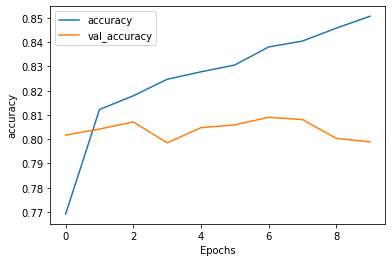

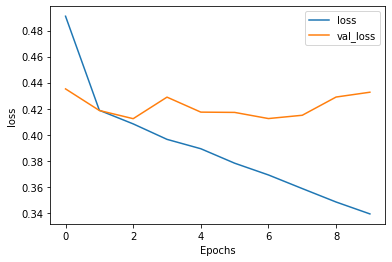

In [21]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history,"loss")

In [22]:
#Using Bidirectional GRU
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [23]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
num_epochs=10
history=model.fit(padded,training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 53s 67ms/step - loss: 0.5446 - accuracy: 0.6997 - val_loss: 0.4424 - val_accuracy: 0.7870
Epoch 2/10
782/782 [==============================] - 52s 66ms/step - loss: 0.4202 - accuracy: 0.8096 - val_loss: 0.4669 - val_accuracy: 0.7738
Epoch 3/10
782/782 [==============================] - 42s 54ms/step - loss: 0.4039 - accuracy: 0.8167 - val_loss: 0.4214 - val_accuracy: 0.8041
Epoch 4/10
782/782 [==============================] - 43s 55ms/step - loss: 0.3915 - accuracy: 0.8250 - val_loss: 0.4213 - val_accuracy: 0.8088
Epoch 5/10
782/782 [==============================] - 47s 61ms/step - loss: 0.3810 - accuracy: 0.8289 - val_loss: 0.4046 - val_accuracy: 0.8115
Epoch 6/10
782/782 [==============================] - 48s 62ms/step - loss: 0.3687 - accuracy: 0.8337 - val_loss: 0.3993 - val_accuracy: 0.8144
Epoch 7/10
782/782 [==============================] - 50s 64ms/step - loss: 0.3553 - accuracy: 0.8412 - val_loss: 0.3981 - val_accuracy:

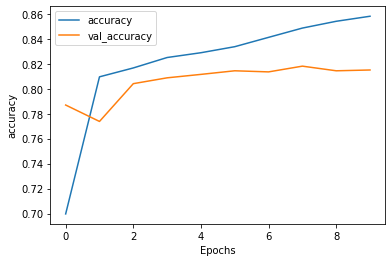

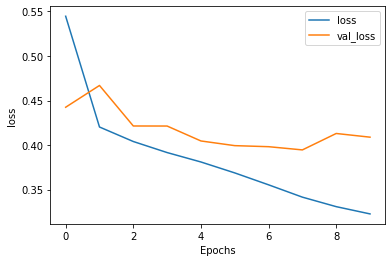

In [24]:
plot_graphs(history, "accuracy")
plot_graphs(history,"loss")

In [25]:
#Using convolutional network
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [26]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
num_epochs=10
history=model.fit(padded,training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6689 - accuracy: 0.5797 - val_loss: 0.6658 - val_accuracy: 0.5839
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6621 - accuracy: 0.5910 - val_loss: 0.6624 - val_accuracy: 0.5884
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 0.6611 - accuracy: 0.5917 - val_loss: 0.6638 - val_accuracy: 0.5847
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.6596 - accuracy: 0.5935 - val_loss: 0.6605 - val_accuracy: 0.5896
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6587 - accuracy: 0.5943 - val_loss: 0.6607 - val_accuracy: 0.5903
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6578 - accuracy: 0.5956 - val_loss: 0.6591 - val_accuracy: 0.5922
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6571 - accuracy: 0.5964 - val_loss: 0.6587 - val_accuracy: 0.5925
Epoch 

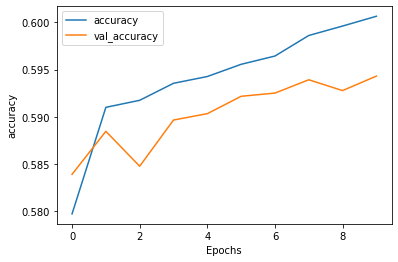

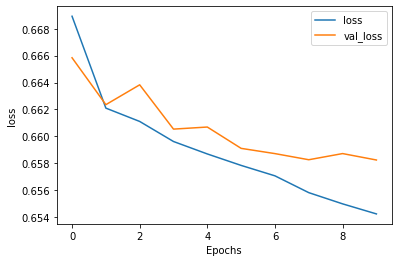

In [27]:
plot_graphs(history, "accuracy")
plot_graphs(history,"loss")